In [1]:
from IPython.display import Image

# 참 거짓 판단 장치 : 로지스틱 회귀
 딥러닝의 과정은 수 많은 '예(참), 아니오(거짓)'의 집합이며, 이러한 복잡한 하나의 질문을 간단한 '예, 아니오'의 집합으로 만드는 과정을 **로지스틱 회귀(Logistic Regression)** 라고 한다.  
  로지스틱 회귀의 원리를 이용하여 "참,거짓"에 대한 회로를 만들면, 이를 모델이라하고, 모델에 값을 넣으면 모델을 기반으로 "참, 거짓" 값을 구한다.

# 로지스틱 회귀의 정의
4장처럼 점수가 아닌, 합격과 불합격만이 발표되는 시험이 있다고해보자.  
공부한 식나에 따른 합격 여부를 조사해보니, 표 5-1과 같다.  
(이는 1장에서 테스트해본 폐암환자 생존/사망에대한 예측과 비슷한 상황이다.)  

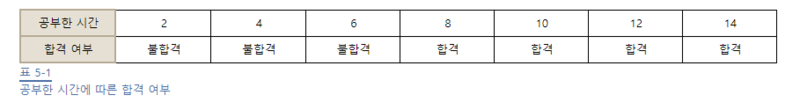

In [52]:
Image('D:/jupyter/deep_learning_for_everyone/05/5-1-1.png',width=900)

합격을 1, 불합격을 0이라 하고, 이를 좌표 평면에 나타내면 아래와 같다.

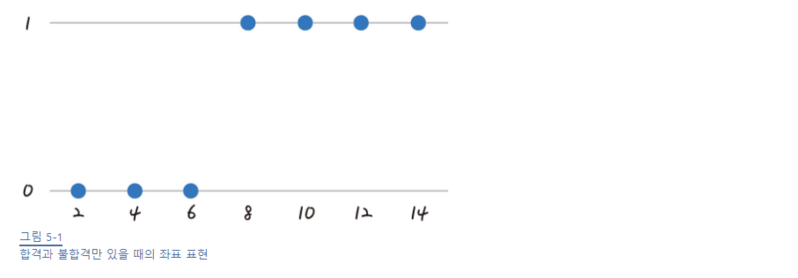

In [51]:
Image('D:/jupyter/deep_learning_for_everyone/05/5-1-2.png',width=900)

앞에서 배운대로 일차방정식의 형태로는 위 점들의 특성을 나타내기 어려움.  
점들의 특성을 정확하게 담아내려면, 직선이 아니라, 다음과 같이 S자 형태여야 한다.  

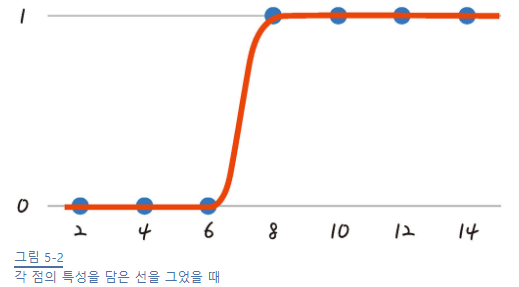

In [49]:
Image('D:/jupyter/deep_learning_for_everyone/05/5-2.png',width=500)

이러한 S자 형태를 가지는 시그모이드 함수라는 것이 존재한다.

# 시그모이드 함수

 2장에서 배운 함수이다. 로지스틱 회귀를 풀어나가는데에 매우 중요하다.  
 시그모이드 함수를 통하여 로지스틱 회귀를 풀어나가는 공식은 다음과 같다.  
 $y= \frac {1}{1+e^{-(ax+b)}}$

위 식을 보면, 결국 ax+b를 구하는것이 목표이다.  
그러면 어기서 a와 b값이 가지는 의미는 무언인가?

먼저 a는 그래프의 경사도를 결정한다.  
아래의 그림을 참고하자.

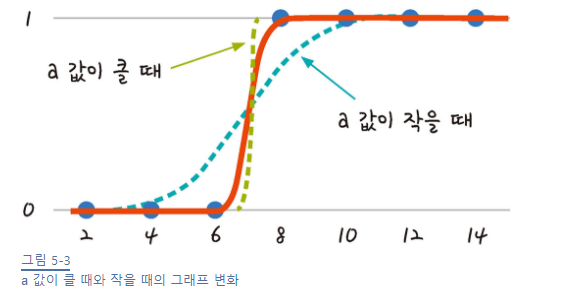

In [35]:
Image('D:/jupyter/deep_learning_for_everyone/05/5-3.png',width=500)

b는 그래프의 좌표이동을 의미한다.  
아래의 그림을 참고하자.

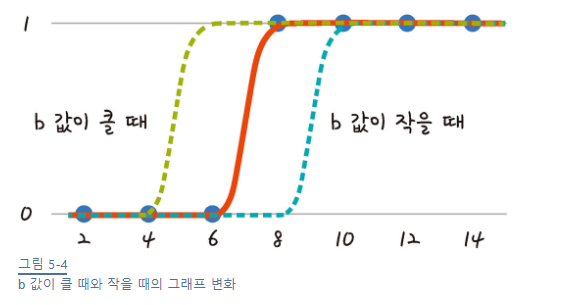

In [36]:
Image('D:/jupyter/deep_learning_for_everyone/05/5-4.png',width=500)

따라서, a와 b의 값에 따라 변화하는 오차를 그래프로 나타내면, 아래와 같다.

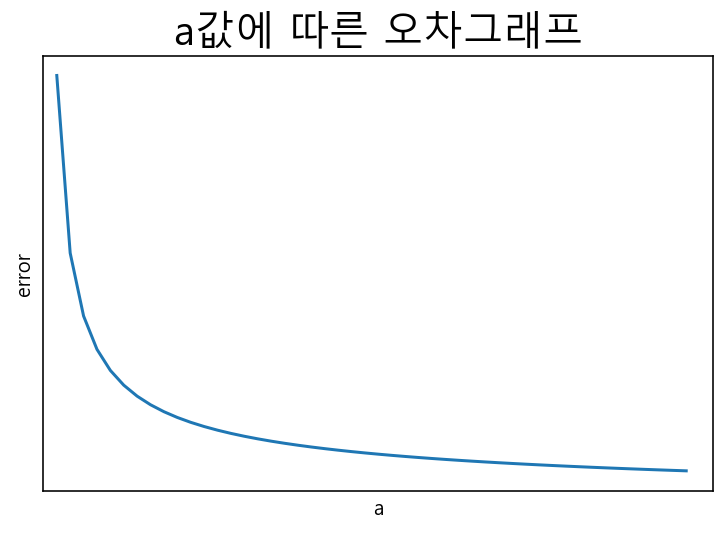

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

np.seterr(divide='ignore', invalid='ignore')
x=np.arange(1,50)
plt.plot(1/np.log(x))
plt.title("a값에 따른 오차그래프", {'fontsize':20})
plt.xlim(0,50)
plt.xlabel('a')
plt.ylabel('error')
plt.xticks()
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.show()

$\begin{align} \text{if } \lim_{a\to \infty} y=-\log{ax+b} \Rightarrow error \rightarrow \infty \end{align}$<br>
$\begin{align} \text{if } \lim_{a\to 0} y=-\log{ax+b} \Rightarrow error \rightarrow min \end{align}$

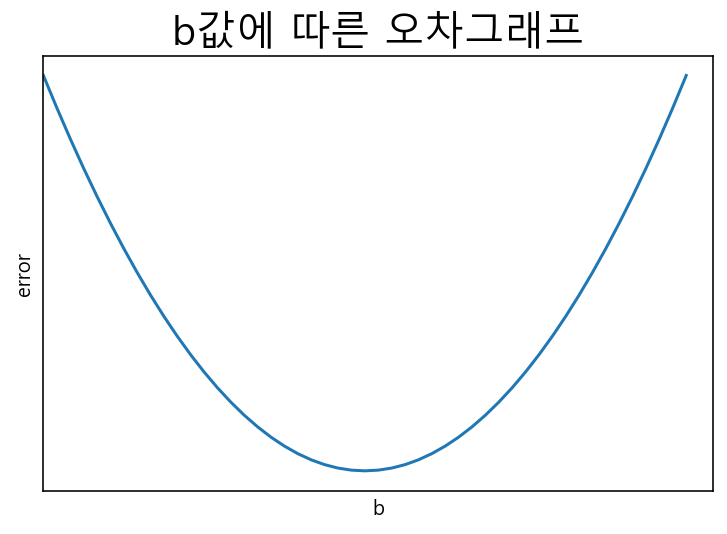

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

np.seterr(divide='ignore', invalid='ignore')
x=np.arange(1,50)
plt.plot((x-25)**2)
plt.title("b값에 따른 오차그래프", {'fontsize':20})
plt.xlim(0,50)
plt.xlabel('b')
plt.ylabel('error')
plt.xticks()
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
plt.show()

b값이 너무 크거나 작을 경우, 오차는 위와 같이 이차 함수 그래프와 유사한 형태로 나타납니다.

# 오차 공식
a와 b값을 구하는 방법 -> 경사하강법  
경사하강법이란, 오차를 구한다음, 오차가 더 작은 쪽으로 이동하는 방법.  
그렇다면, 이번에도 오차를 구하는 방법이 필요하다.  
aka. 시그모이드 함수의 오차

우선, 시그모이드 함수의 특지을 살펴보자.  
시그모이드 함수의 특징은 y값이 0과 1사이라는 것.  
따라서, 실제값이 1이냐 0이냐와 예측값이 1에 가까운지, 0에 가까운지에 따라 오차가 결정.

이를 공식으로 표현하면 로그함수!

# 로그 함수

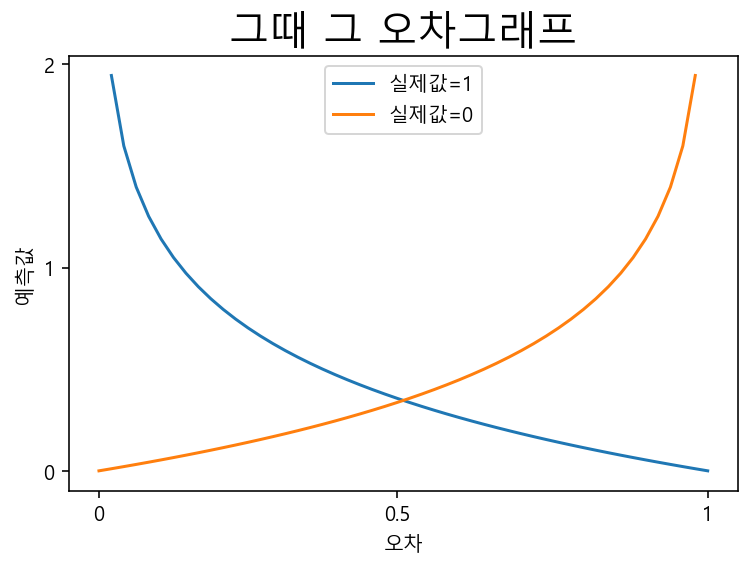

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
np.seterr(divide='ignore', invalid='ignore')
x = np.linspace(0,1)

plt.plot(-1*np.log(x))
plt.plot(-1*np.log(1-x))
plt.title("그때 그 오차그래프", {'fontsize':20})
plt.xlabel('오차')
plt.ylabel('예측값')
plt.xticks([0,24,49],[0,0.5,1])
plt.yticks([0,2,4],[0,1,2])
plt.legend(['실제값=1','실제값=0'])
plt.show()

실제값이 1일 때는 $- \log {h}$ 를 쓰고,  
실제값이 0일 때는 $- \log{(1-h)}$를 사용해야 한다.  
  
이를 다음과 같은 식으로 표현 할 수 있다.

$\begin{align} -\{ y\_data \cdot \log h +(1-y\_data) \cdot \log (1-h)\} \end{align}$

실제 값을 $y\_data$라고 할 때, 이 값이 1이면 뒷부분이 없어지고, 반대로 0이면, A부분이 없어진다.  
따라서, 실제 값에 따라 빨간색 그래프와 팔나색 그래프를 각각 사용할 수 있게 된다.

# 코딩으로 확인하는 로지스틱 회귀

지금까지 배운 것을 정리하면, 로지스틱 회귀를 위해서는 시그모이드 함수를 사용한다는 것.  
그리고 0부터 1사이의 값을 가지는 특성 때문에 로그 함수를 함계 써야 한다는 것.  
이제 경사 하강법을 이용해 a와 b의 최적 값을 찾는 과정을 해 볼 차례.  
앞서 선형 회귀에서 배운것과 방법을 동일합니다.  
먼저 공부 시간과 합격 여부 리스트를 다음과 같이 만들어 줍니다.  

(-0.1, 1.1)

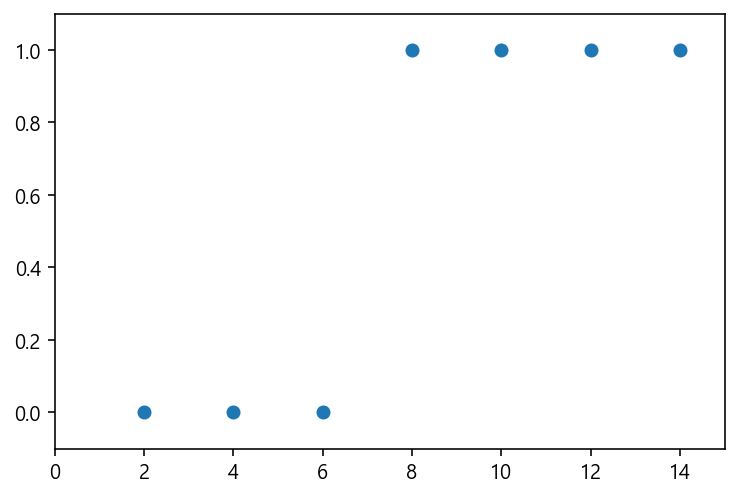

In [10]:
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x_data = [i[0] for i in data]  # 공부한 시간 데이터
y_data = [i[1] for i in data]  # 합격여부

plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

기울기 a와 절편 b의 값을 초기화하고 학습률을 정합니다. 학습률은 임의로 0.05로 정하겠습니다.

In [11]:
a=0
b=0

lr= 0.05 # 학습률

def sigmoid(x): #simgmod라는 이름의 함수
    return 1/(1+np.e **(-x)) # 시그모이드의 식을 그대로 파이선으로 나타냄

이제 경사하강법을 시행 순서.  
a와 b로 편미분한 값 (a_diff, b_diff)에 학습률(lr)을 곱하여 각각 업데이트.  
오차를 구하는 함수가 다름으로 a_diff와 b_diff를 결정하는 식을 병경.  
로지스틱 회귀의 오차 함수는 조금 전에 배운것을 이용하여 다음과 같이표기

시그모이드 함수에서 오차를 구하는 식 :  
$- \frac {1}{n} \sum y \log h + (1-y) \log(1-h))$

이 식을 a와 b로 편미분 한것.

epoch=0, 기울기=1.9068, 절편=-12.9513
epoch=0, 기울기=1.9058, 절편=-12.9515
epoch=0, 기울기=1.8518, 절편=-12.9605
epoch=0, 기울기=1.9060, 절편=-12.9537
epoch=0, 기울기=1.9071, 절편=-12.9536
epoch=0, 기울기=1.9071, 절편=-12.9536
epoch=0, 기울기=1.9071, 절편=-12.9536
epoch=1000, 기울기=2.1840, 절편=-14.9583
epoch=1000, 기울기=2.1836, 절편=-14.9584
epoch=1000, 기울기=2.1431, 절편=-14.9652
epoch=1000, 기울기=2.1837, 절편=-14.9601
epoch=1000, 기울기=2.1842, 절편=-14.9601
epoch=1000, 기울기=2.1843, 절편=-14.9601
epoch=1000, 기울기=2.1843, 절편=-14.9601
epoch=2000, 기울기=2.3969, 절편=-16.4872
epoch=2000, 기울기=2.3967, 절편=-16.4873
epoch=2000, 기울기=2.3642, 절편=-16.4927
epoch=2000, 기울기=2.3968, 절편=-16.4886
epoch=2000, 기울기=2.3971, 절편=-16.4886
epoch=2000, 기울기=2.3971, 절편=-16.4886
epoch=2000, 기울기=2.3971, 절편=-16.4886


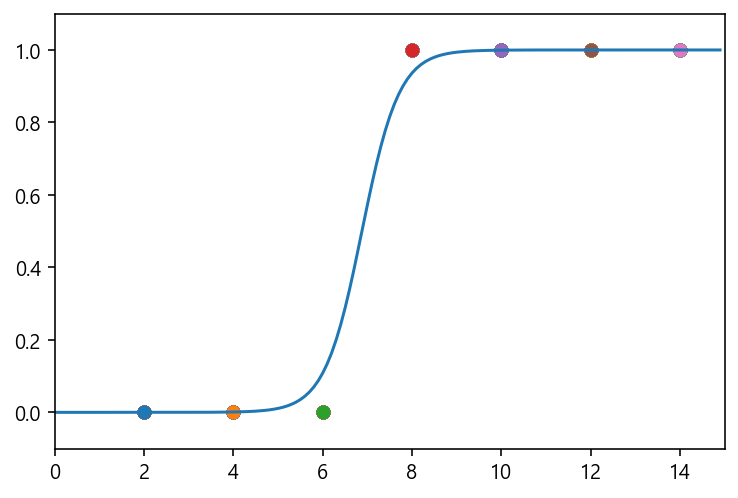

In [13]:
for i in range(2001):
    for x_data, y_data in data:
        # a에 관한 편미분, 앞서 정의한 sigmoid함수 사용
        a_diff = x_data*(sigmoid(a*x_data+b)-y_data)
        # b에 관한 편미분
        b_diff = sigmoid(a*x_data+b)-y_data
        
        # a를 업데이트 하기 위해 a_diff에 학습률 lr을 곱한 값을 a에서 뺌.
        a=a-lr*a_diff
        
        # b를 업데이트 하기 위해 b_diff에 학습률 lr을 곱한 값을 b에서 뺌.
        b=b-lr*b_diff
        
        if i % 1000 == 0 :
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f"%(i,a,b))
            
        # 앞서 구한 기울기와 절편을 이용해 그래프 그리기
        plt.scatter(x_data, y_data)

    plt.xlim(0,15)
    plt.ylim(-.1, 1.1)
    x_range=(np.arange(0, 15, 0.1)) # 그래프로 나타냄 x 값의 범위 정하기
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x+b) for x in x_range]))

plt.show()

**Conclusion**  
시그모이드 형태의 함수가 잘 만들어지도록 a와 b의 값이 수렴된 것을 알 수 있습니다.  
따라서, 한개의 독립변수를 가지고, 그 종속변수의 값이 '1과 0' 혹은 '참 거짓' 등과 같이 두가지의 경우로 나뉘는 경우엔 시그모이드 함수와 경사하강법을 이용한 로지스틱 회귀를 통해 모델을 만들 수 있었다.

만약 여기에 입력 값이 추가되어 세 개 이상의 입력 값을 다룬다면,  
시그모이드 함수가 아니라 **소프트맥스(softmax)** 라는 함수를 써야한다.  
소프트맥스를 사용하는 다중 분류 문제는 실제 데이터를 가지고 12자에서 다루어볼 예정.  

# 로지스틱 회귀에서 퍼셉트론으로
 지금까지 배운 내용을 정리해 보겠습니다. 입력 값을 통해 출력 값을 구하는 함수y는 다음과 같이 표현할 수 있습니다.  
 $y=a_1x_1+a_2x_2+b$

독립변수 $x_1$, $x_2$ $\rightarrow$ 입력값.  
종속변수 $y$ $\rightarrow$ 출력값.  
출력 값을 구하려면 $a_1$과 $a_2$값 그리고 b값이 필요합니다.  
이를 그리므로 나타내면 다음과 같습니다.

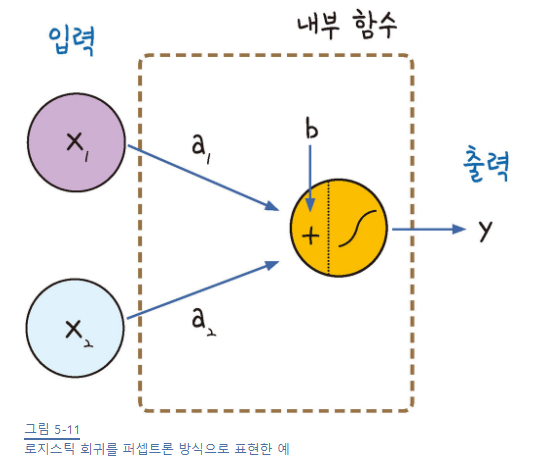

In [24]:
Image('D:/jupyter/deep_learning_for_everyone/05/5-11.png',width=300)

$x_1$과 $x_2$가 입력되고, 각각 가중치 $a_1$,$a_2$를 만납니다. 여기에 b 값을 더한 후 시그모이드 함수를 거쳐 1 또는 0의 출력 값 y를 출력합니다. 우리가 지금 까지 배운 내용을 위 그림에서 한눈에 설명하고 있습니다.
그런데 이 그림을 아주 오래저넹 그려서 발표한 사람이 있었습니다. 1957년, 코넬 항공 연구소의 프랑크 로젠브라트라는 사람은 이 개념을 고안해 발표하고 여기에 **퍼셉트론(perceptron)** 이라는 이름을 붙였습니다.  
이 퍼셉트론은 그 후 여러 학자들의 노력을 통해 인공 신경망, 오차 역전파 등의 발전을 거쳐 지금의 딥러닝으로 이어지 됩니다. 다음 장에서는 퍼셉트로니 어떻게 딥러닝의 골격인 신경망을 구성하는지 설명하겠습니다.

# 5장을 마치며..
 5장에서는 로지스틱회귀를 통하여 독립변수가 하나이고, 종속변수의 결과가 두가지인 상황에대하여 예측하는 모델을 만들어 보았다.  
 추후에 이를 논리회로처럼 작동하여 쌓고쌓아 모이고 모여서 복잡한 판단을 하게 하는 것이 가능할 것이라 생각이된다.  
 반대로 이 로지스틱회귀를 쌓아올리는 과정에서 그 기반을 이루는 (참, 거짓)의 판단이 잘못이루어진다면, 최종적으로 쌓아올린 모델에서 결과값에 큰 영향을 미칠수도 있음으로 주의해야할것이라 생가된다.